<h1>Data Analysis</h1>

<h2>Questions to answer:</h2>
- Is there a correlation between word count and number of favorites received by user?
- What years were most stories published?
- In what month did most stories get published?
- What character pairings were most common?
- What genres received most Favorites and most Reviews?
- Is there a correlation between Favorites and Reviews?

To start, let's upload the cleaned_data.csv file to analyze and import the necessary packages. I'll ask for a preview of the cleaned data with the head() funciton.

In [33]:
import pandas as pd
import numpy as np
from pathlib import Path



# load the clean harry data into a dataframe and preview first lines
harry_data_path = Path('cleaned_data.csv')
harry_df = pd.read_csv(harry_data_path)
harry_df.head()

,Chapters,Favs,Follows,Published,Reviews,Words,author,characters,genre,rating,synopsis,title,pairing,Month Published,Year Published
0,1,25,70,12/31/2019,6.0,"7,788",reviews,"[Hermione G., Draco M., T. Rowle] Rodolphus L.",NaN,M,All it takes is one spell for Tom Riddle to so...,Once Removed,"Hermione G., Draco M., T. Rowle",12,2019
1,1,2,1,12/31/2019,1.0,"4,178",reviews,"[Narcissa M., OC] [Cedric D., Harry P.]",Drama/Supernatural,M,God/Goddess!AU. When two gods of Olympus make ...,For the Love of Gods,"Narcissa M., OC",12,2019
2,1,71,25,12/31/2019,22.0,"3,790",reviews,"[Hermione G., Draco M.]",Romance/Angst,M,Second part to SECOND CHANCE: The decision to ...,Second Chance: New Years Eve,"Hermione G., Draco M.",12,2019
3,4,57,57,12/31/2019,14.0,"14,391",LSUSWEETIE,"[Fred W., Hermione G.]",Romance,M,Fred asks Hermione to attend a New Year's Eve ...,Only Mine Till Midnight,"Fred W., Hermione G.",12,2019
4,2,17,40,12/31/2019,13.0,"2,872",Peanutbuttertoast1,"[Hermione G., Draco M.] [Harry P., Ginny W.]",Angst/Romance,K+,Holidays are always a time for reflection...fo...,A Year In The Life,"Hermione G., Draco M.",12,2019


I'm curious to see if there's a correlation between how many favorites a story receives and how long it is. I'll do scatter plot to see if there's a correlation between 'word count' and 'favorites'

In [34]:
#have to import matplotlib
import matplotlib.pyplot as plt


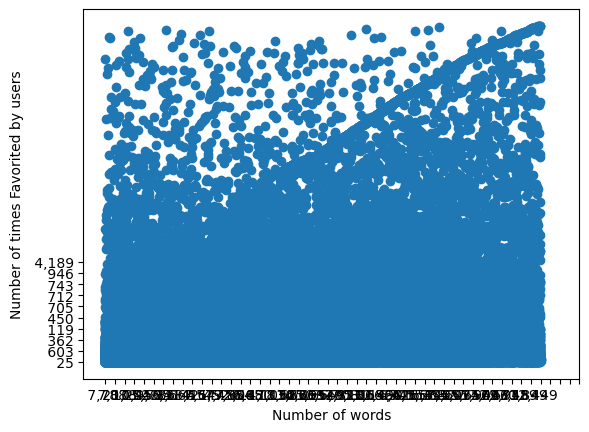

In [38]:
plt.scatter(harry_df['Words'], harry_df['Favs'])
plt.xlabel('Number of words')
plt.ylabel('Number of times Favorited by users')
plt.xticks(range(0, 50000, 1000))
plt.yticks(range(0, 1000, 100))
plt.show()
plt.show()

Hmm can't tell too much from this scatter plot. Definitely not obvious if there's a correlation.

<h2>What years were most stories published?</h2>

In [44]:
# Group by year and count the number of stories
stories_published_by_year = harry_df.groupby('Year Published')['title'].count()

# Sort in descending order
stories_published_by_year = stories_published_by_year.sort_values(ascending=False)

# Print the resulting Series
print(stories_published_by_year)





Year Published
2011    38575
2010    27564
2007    27364
2009    25962
2005    25114
2006    25039
2008    24945
2015     5278
2017     5158
2014     5067
2016     5016
2018     4933
2019     3662
2013     2868
2012     2160
2004     1705
Name: title, dtype: int64
